# Typical ML steps:

1. train model
2. test model (evaluate: is it good?)
3. make new predictions

# Estimators

Examples: LinearRegression, LogisticRegression

1. `fit(X, y)`
2. `score(X, y)`
3. `predict(X)` (or `.coef_` and `.intercept_`)

# Transformers

Examples: PCA, PolynomialFeatures

1. `fit_transform` (`fit` then `transform`)
2. `transform`
3. `transform`

# Pipeline

Chain of zero or more transformers, ending with an estimator.

Transformer -> Transformer -> Transformer -> Estimator

In [1]:
import numpy as np
import pandas as pd

n = 1000
df = pd.DataFrame({
    "x": np.random.uniform(-10, 10, n),
    "y": np.random.uniform(-10, 10, n),
})
df["color"] = "lightgray"
dist = ((df["x"]-4)**2 + (df["y"]-1)**2) ** 0.5
df.loc[dist < 4 + np.random.normal(size=n), "color"] = "black"
df.head()

,x,y,color
0,-8.763771,3.178939,lightgray
1,8.880830,-4.757829,lightgray
2,8.237543,-3.998483,lightgray
3,1.494392,-0.147054,black
4,5.069647,-9.018868,lightgray


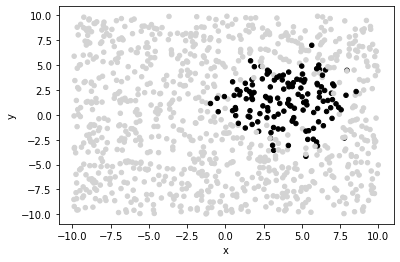

In [2]:
df.plot.scatter(x="x", y="y", c=df["color"])

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [4]:
train, test = train_test_split(df)
train.head()

,x,y,color
749,2.260676,0.126332,black
53,0.676192,-0.073506,black
890,4.402538,-0.519319,black
904,9.504032,8.606693,lightgray
232,-3.435798,-5.441145,lightgray


In [5]:
lr = LogisticRegression()
lr.fit(train[["x", "y"]], train["color"]) # 1. train

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
lr.score(test[["x", "y"]], test["color"]) # 2. test/evaluate

0.848

In [7]:
test = test.copy()
test["predicted_color"] = lr.predict(test[["x", "y"]])
test.head()

,x,y,color,predicted_color
684,4.940633,2.700842,black,lightgray
156,-5.396358,4.865649,lightgray,lightgray
735,-9.113568,-6.025955,lightgray,lightgray
738,-6.612467,-2.735241,lightgray,lightgray
888,0.076178,-9.613622,lightgray,lightgray


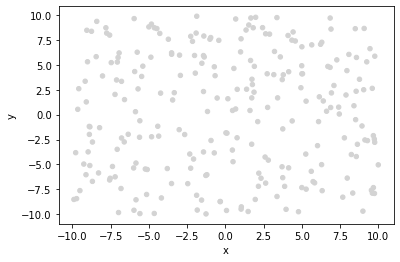

In [8]:
test.plot.scatter(x="x", y="y", c=test["predicted_color"])

In [9]:
pf = PolynomialFeatures(include_bias=False)
pd.DataFrame(pf.fit_transform(train[["x", "y"]]),
             columns=pf.get_feature_names(["x", "y"])).head()

,x,y,x^2,x y,y^2
0,2.260676,0.126332,5.110658,0.285595,0.015960
1,0.676192,-0.073506,0.457236,-0.049704,0.005403
2,4.402538,-0.519319,19.382337,-2.286323,0.269692
3,9.504032,8.606693,90.326616,81.798279,74.075160
4,-3.435798,-5.441145,11.804708,18.694674,29.606055


In [10]:
pipe = Pipeline([
    ("poly", PolynomialFeatures(include_bias=False)), 
    ("logr", LogisticRegression()), 
])
pipe.fit(train[["x", "y"]], train["color"]) # 1. train

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('logr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [11]:
pipe.score(test[["x", "y"]], test["color"]) # 2. test/evaluate

0.952

In [12]:
test["predicted_color"] = pipe.predict(test[["x", "y"]])
test.head()

,x,y,color,predicted_color
684,4.940633,2.700842,black,black
156,-5.396358,4.865649,lightgray,lightgray
735,-9.113568,-6.025955,lightgray,lightgray
738,-6.612467,-2.735241,lightgray,lightgray
888,0.076178,-9.613622,lightgray,lightgray


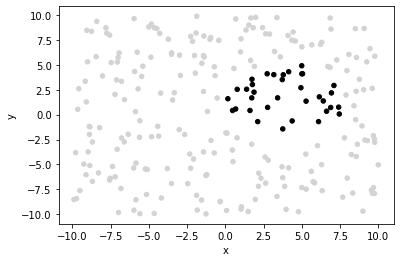

In [13]:
test.plot.scatter(x="x", y="y", c=test["predicted_color"])

# Practice

In [14]:
x1 = np.random.uniform(0,1,100)
x2 = np.random.uniform(8000,9000,100)
y = x1 * 1000 + x2 > 9000
df = pd.DataFrame({"x1":x1, "x2":x2, "y":y})
df.head()

,x1,x2,y
0,0.016340,8154.311835,False
1,0.306119,8648.857569,False
2,0.650497,8768.353592,True
3,0.759684,8375.026889,True
4,0.989505,8969.368016,True


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

train, test = train_test_split(df)
lr = LogisticRegression()
lr.fit(train[["x1", "x2"]], train["y"])
lr.score(test[["x1", "x2"]], test["y"])

0.48

In [16]:
pipe = Pipeline([
    ("std", StandardScaler()),
    ("lr", LogisticRegression()),
])

pipe.fit(train[["x1", "x2"]], train["y"])
pipe.score(test[["x1", "x2"]], test["y"])

0.96